# u7280249 Assignment 3 ASTR4004

## Task 1

### Part 1

The following is the code I used to establish the git repository. This `.ipynb` file itself is also in the repository.

```
echo "Hello World!" >> README.md
git init
git add *
git commit -m "Here is some code"
git remote add origin git@github.com:Olivex727/olivia-astr4004-ass3.git
git branch -M main
git push --set-upstream origin main
```

### Part 2

Note that the 5th command only works onmy device due to SSH permissions. The repository is available here: [https://github.com/Olivex727/olivia-astr4004-ass3](https://github.com/Olivex727/olivia-astr4004-ass3). The next step is to add content and commit it:

```
git checkout -b hello-again
echo "Hello Again!" >> README.md
git add *
git commit -m "Hello again"
git push --set-upstream origin hello-again
```

### Part 3

To merge branches we simply:

```
git checkout main
git merge hello-again
git branch -d hello-again
git push --all origin
```

I did not actually run the 3rd command as it would delete the branch, removing the artifact behind. However GitHub automatically deletes a branch after merger (it is toggleable). This should be enough for the excersise. I will be committing the rest of these excersises on a seperate branch and merge again.

## Task 2

### Part 1

For part 1 the ADQL query can be called directly on the Gaia website or using the astroquery module, here's the query:

In [1]:
from astroquery.gaia import Gaia
import numpy as np

In [2]:
query = f"""
-- Select Gaia DR3 and 2MASS data, specifically the values we need to answer this question
SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.phot_g_mean_mag, gaia.parallax, gaia.bp_rp, tmass.j_m, tmass.ks_m, tmass.ph_qual, tmass.designation
FROM gaiadr3.gaia_source AS gaia

-- Use the single cross-match as shown in lectures (there's really not much I can change from what is provided on Gaia's website)
JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id)
JOIN gaiaedr3.tmass_psc_xsc_join AS xjoin
   ON xmatch.original_ext_source_id = xjoin.original_psc_source_id
JOIN gaiadr1.tmass_original_valid AS tmass
   ON xjoin.original_psc_source_id = tmass.designation

-- Isolate the desired parameters
WHERE
    gaia.phot_g_mean_mag < 14 AND
    DISTANCE(POINT('ICRS', gaia.ra, gaia.dec), POINT('ICRS', 132.825, 11.8)) < 1
"""

# Upload the source_id table for crossmatching
job = Gaia.launch_job_async(query=query)
gaiadr3_match = job.get_results()

gaiadr3_match

INFO: Query finished. [astroquery.utils.tap.core]


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
608020176290124544,132.1646618883753,12.54693864090943,5.63165,2.690376957952657,2.4299536,3.036,1.903,DCD,08483954+1232489
598677041873269888,132.98471168386044,11.135822334712053,7.1276755,2.957272390834695,1.3400488,5.394,4.686,ADA,08515632+1108091
604920240695111424,132.95558297375214,11.89417916328316,7.543855,3.4395394445433713,1.2504802,5.889,5.232,AAA,08514935+1153388
604992258706635520,132.39087730250452,12.170842774554602,7.6000934,16.694126797894192,0.67128706,6.723,6.467,AAA,08493387+1210146
604684326730942592,133.12692088532611,11.258976562554766,7.9480596,1.1630593472821595,2.1596684,5.392,4.364,EEE,08523047+1115323
598949304144504448,132.07497295248402,11.583996462974458,8.11953,2.869466983909209,1.1354628,6.648,6.051,AAA,08481801+1135025
604997202213330560,132.86371938949912,12.127791998043406,8.157011,5.622660195526254,0.49772835,7.285,7.086,AAA,08512734+1207406
598878424300068352,132.47998197025302,11.252778942347105,8.21223,2.4558152309639096,1.1176262,6.767,6.17,AAA,08495521+1115102


### Part 2

Showing the table above already satisfies the question, that there are 1018 entries, however here's a hardcoding of the answer:

In [3]:
print("Amount of Stars: "+str(len(gaiadr3_match)))

Amount of Stars: 1018


### Part 3

We can make a mask and count the number of true values in the mask.

In [4]:
tmass_mask = gaiadr3_match["ph_qual"] != 'AAA'

print("No. of Low-Quality 2MASS Stars: " + str(np.sum(tmass_mask)))

gaiadr3_match[tmass_mask]

No. of Low-Quality 2MASS Stars: 21


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
608020176290124544,132.1646618883753,12.54693864090943,5.63165,2.690376957952657,2.4299536,3.036,1.903,DCD,08483954+1232489
598677041873269888,132.98471168386044,11.135822334712053,7.1276755,2.957272390834695,1.3400488,5.394,4.686,ADA,08515632+1108091
604684326730942592,133.12692088532611,11.258976562554766,7.9480596,1.1630593472821595,2.1596684,5.392,4.364,EEE,08523047+1115323
605101037342309376,133.25384248975615,12.370193849409716,9.322637,1.6012014288815182,1.112257,7.883,7.31,AAE,08530092+1222124
598689102141448320,132.9215946592312,11.161628869508299,9.365868,7.44466758861682,0.7221241,8.608,8.115,UAA,08514117+1109421
598955115237068032,132.48669417880745,11.692484141091276,9.409208,1.1905377048633794,1.4588013,7.542,6.693,AAF,08495682+1141329
604950271106216064,133.00959830473363,12.08749464157222,10.553087,0.6536709234487615,1.3552113,8.843,8.079,AAF,08520230+1205150
604911268507711232,132.8097517211022,11.750135043124263,10.977456,1.251831791627078,0.58271503,10.081,9.918,EEE,08511436+1145005


### Part 4

We can do the same as above

In [5]:
parax_mask = gaiadr3_match["parallax"] <= 0

print("No. of Bad-Parallax Stars:      " + str(np.sum(parax_mask)))

gaiadr3_match[parax_mask]

No. of Bad-Parallax Stars:      2


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
604918282190043648,132.89017067428628,11.862498376939232,13.116055,-0.12074027232455467,0.80105686,12.026,11.652,AAA,08513364+1151449
598847569256078464,132.41064947639805,11.033372831460598,13.549349,-0.16481842755765533,1.0036774,12.178,11.643,AAA,08493856+1102000


### Part 5

We can filter out our data using the masks we made. Since both bad-parallax stars are AAA quality, masking should remove 21 + 2 = 23 entries. Giving 995 entries in total.

In [6]:
gaiadr3_cut = gaiadr3_match[~tmass_mask]

# We need to define a new mask to fit the new table size
parax_mask = gaiadr3_cut["parallax"] <= 0

gaiadr3_cut = gaiadr3_cut[~parax_mask]

print("No. of Quality Stars: "+str(len(gaiadr3_cut)))

gaiadr3_cut

No. of Quality Stars: 995


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
604920240695111424,132.95558297375214,11.89417916328316,7.543855,3.4395394445433713,1.2504802,5.889,5.232,AAA,08514935+1153388
604992258706635520,132.39087730250452,12.170842774554602,7.6000934,16.694126797894192,0.67128706,6.723,6.467,AAA,08493387+1210146
598949304144504448,132.07497295248402,11.583996462974458,8.11953,2.869466983909209,1.1354628,6.648,6.051,AAA,08481801+1135025
604997202213330560,132.86371938949912,12.127791998043406,8.157011,5.622660195526254,0.49772835,7.285,7.086,AAA,08512734+1207406
598878424300068352,132.47998197025302,11.252778942347105,8.21223,2.4558152309639096,1.1176262,6.767,6.17,AAA,08495521+1115102
601999250616455168,131.8983060301823,12.17069243211625,8.218385,1.5435949287383588,1.4184194,6.391,5.612,AAA,08473559+1210146
604962193935568896,132.55120535653674,11.856791616775809,8.222472,1.1811350509906289,1.8043594,6.01,5.02,AAA,08501230+1151246
598887594054812288,132.57755317060142,11.407827304973624,8.447178,1.8642634783410874,1.2570438,6.8,6.129,AAA,08501862+1124283


### Parts 6 & 7

In [7]:
import matplotlib.pyplot as plt

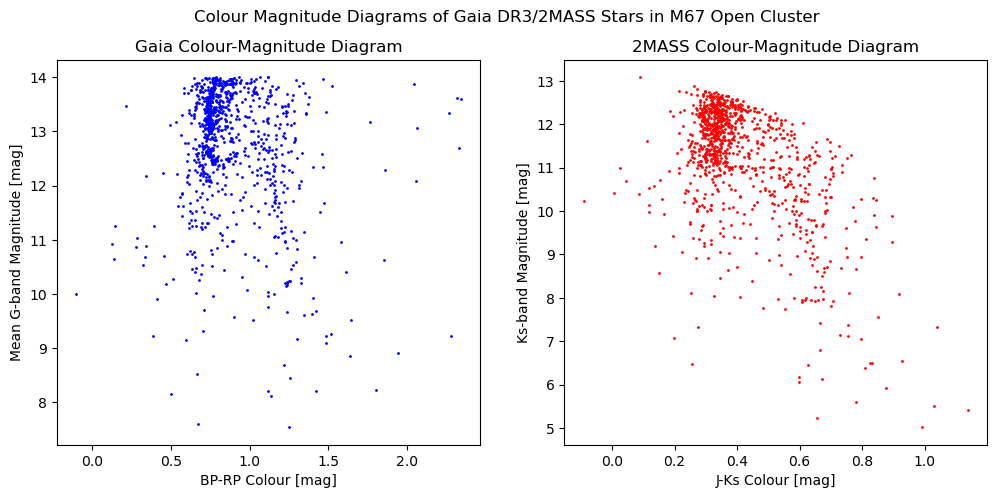

In [8]:
# Define figure
fig, [ax1, ax2]= plt.subplots(1, 2)

# Set big parameters
fig.set_size_inches(12, 5)
fig.suptitle("Colour Magnitude Diagrams of Gaia DR3/2MASS Stars in M67 Open Cluster")

# Gaia Colours
ax1.set_title("Gaia Colour-Magnitude Diagram")
ax1.plot(gaiadr3_cut["bp_rp"], gaiadr3_cut["phot_g_mean_mag"], 'bo', markersize=1)
ax1.set_xlabel("BP-RP Colour [mag]")
ax1.set_ylabel("Mean G-band Magnitude [mag]")

# 2MASS Colours
ax2.set_title("2MASS Colour-Magnitude Diagram")
ax2.plot(gaiadr3_cut["j_m"]-gaiadr3_cut["ks_m"], gaiadr3_cut["ks_m"], 'ro', markersize=1)
ax2.set_xlabel("J-Ks Colour [mag]")
ax2.set_ylabel("Ks-band Magnitude [mag]")

# Save and Show Figure
plt.savefig("./figures/cmds_M67.png", dpi=200)
plt.show()

### Part 8

The HERMES 2dF spectrograph can measure all of the optical and near-IR at 471.5 - 788.7 nm (just to confirm that this is the correct intstrument to use). So, observing these stars, which appear to have decent presence in both the optical (BP-RP) and infrared (J-Ks) can be done with HERMES. There also seems to be plenty of stars below a G-band magnitude of 14, however, most of these stars barely meet the threshold at 12-14 mag. So they should expect some interference, which is very common in astronomy.

tl;dr I think it's a perfectly valid project to undertake.

## Task 3

### Part 1 & 2

We can't really seperate out these two parts, as the linear fit is required for the graphing. I used `np.polyfit` linear fitting, which uses least squares.

In [9]:
from astropy.io import fits
from pandas import DataFrame as df
import numpy as np
from matplotlib import pyplot as plt, colors
from scipy.stats import binned_statistic_2d
from sklearn.metrics import r2_score

# Import the FITS data
hdu = fits.open("./data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits")
data = df.from_records(hdu[1].data)
hdu.close()

data

,x,y,z,A_O
0,10.020546,-15.421509,-3.241711,8.428943
1,-13.487837,5.663507,-0.802306,8.671107
2,6.642289,-0.138942,-0.585961,8.891596
3,0.203939,4.112373,-0.147622,8.977195
4,-20.824045,6.971037,-1.758061,8.326950
...,...,...,...,...
511515,1.533189,0.998079,0.217088,9.102036
511516,1.532199,0.998165,0.216980,9.102036
511517,1.698204,-1.207707,0.121088,9.081205
511518,1.698204,-1.206664,0.121917,9.081205


In [10]:
# Get the data into a nice set of arrays
R_gal = np.sqrt(data['x'] ** 2 + data['y'] ** 2)
a_O = data["A_O"]

# Linear fit with mx + b
[m, b], [[m_v, _], [_, b_v]] = np.polyfit(R_gal, a_O, 1, cov=True)
[m_u, b_u] = np.sqrt(np.array([m_v, b_v]))
print("Linear Fit of R_gal to A(O): m=%.3g+/-%.2g, b=%.3g+/-%.2g" % (m, m_u, b, b_u))

# Create residuals of A(O)
da_O = a_O - (m * R_gal + b)

# Create model of A(O)
ma_O = m*R_gal+b

Linear Fit of R_gal to A(O): m=-0.0342+/-1.5e-05, b=9.13+/-0.00023


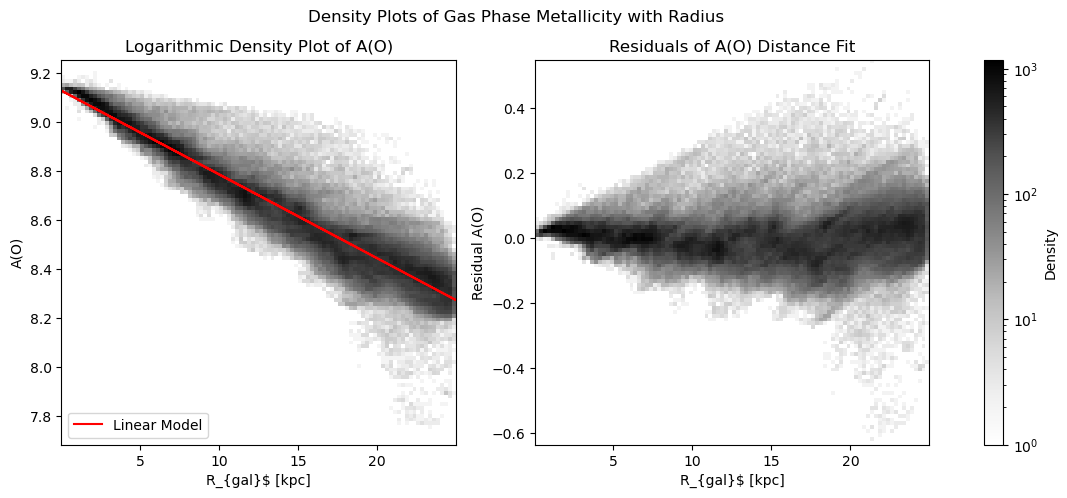

In [11]:
# Plot the data

# Define figure
fig, ax = plt.subplots(1, 2)
[ax1, ax2] = ax

# Set big parameters
fig.set_size_inches(14, 5)
fig.suptitle("Density Plots of Gas Phase Metallicity with Radius", x=0.45)

# Define a nice colour map (black and white is both paper and eyeball friendly)
cmap = 'Greys'

# Log density plot
ax1.set_title("Logarithmic Density Plot of A(O)")
_, _, _, cim = ax1.hist2d(R_gal, a_O, bins=100, cmap=cmap, norm=colors.LogNorm())
ax1.plot(R_gal, ma_O, 'r', label="Linear Model")
ax1.set_xlabel("R_{gal}$ [kpc]")
ax1.set_ylabel("A(O)")
ax1.legend(loc='lower left')

# Residuals plot
ax2.set_title("Residuals of A(O) Distance Fit")
#ax2.plot(R_gal, da_O, 'bo', markersize=1)
_, _, _, cim = ax2.hist2d(R_gal, da_O, bins=100, cmap=cmap, norm=colors.LogNorm())
ax2.set_xlabel("R_{gal}$ [kpc]")
ax2.set_ylabel("Residual A(O)")

# Add universal colourbar - matplotlib will ensure both follow the same scaling regime
fig.colorbar(cim, ax=ax.ravel().tolist(), label="Density")

# Save and Show Figure
plt.savefig("./figures/gas_phase_metallicity_1.png", dpi=200)
plt.show()

### Part 3

From above, the linear model fits quite well, at least by eye. It certainly isn't awful. However on closer inspection it does appear that the model tends to under-estimate the gas-phase metallicity values (especially closer to the galactic centre). This is because there are some particularly low A(O) values further out, influencing the gradient/intercept downward.

We can do some statistical tests to quantify the goodness-of-fit. The $R^2$ value is a good measure of the data's overall correlation, which should be as close to 1 as possible. We can quantify how the scatter in the data affects the fit using a travelling average and deviation (using either mean/median, and variance/IQR).

In [12]:
# Calculate R-squared Score
rsq = r2_score(a_O, ma_O)
print("R-squared value of linear fit: %.4g" % rsq)

R-squared value of linear fit: 0.9125


In [13]:
# Plot the binned travelling average

# Define bins
nbins = 50
bin_edges = np.linspace(0, 25, nbins+1)
Rs = (bin_edges[:-1] + bin_edges[1:])/2

# Create 2d bin array
bins = [ [] for _ in range(nbins)]
for i in range(len(R_gal)):
    check = np.argmax(bin_edges[bin_edges<=R_gal[i]])
    bins[check].append(da_O[i])

# Create arrays representing moving values
mv_mean   = np.array([ np.mean(arr) for arr in bins ])
mv_median = np.array([ np.median(arr) for arr in bins ])
mv_std    = np.array([ np.std(arr) for arr in bins ])
mv_25     = np.array([ np.percentile(arr, 25) for arr in bins ])
mv_75     = np.array([ np.percentile(arr, 75) for arr in bins ])

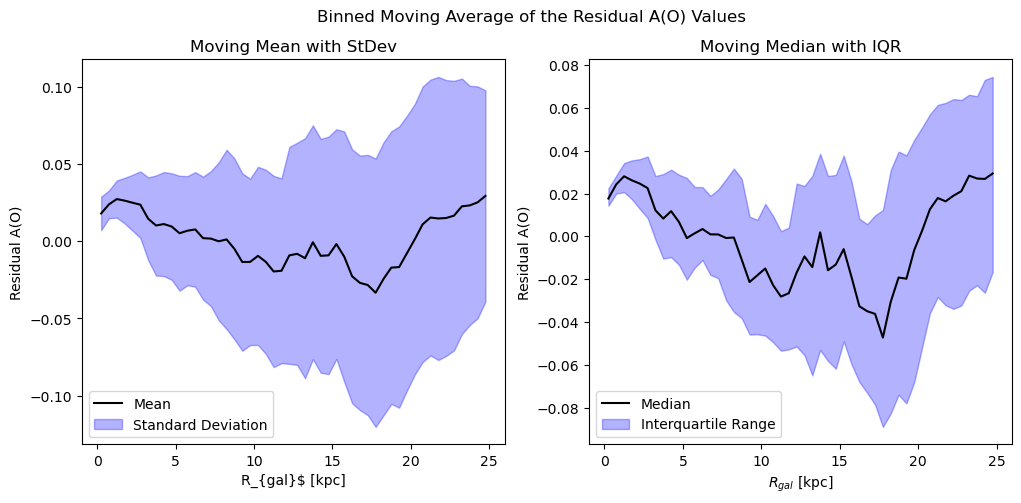

In [14]:
# Plot the data

# Define figure
fig, ax = plt.subplots(1, 2)
[ax1, ax2] = ax

# Set big parameters
fig.set_size_inches(12, 5)
fig.suptitle("Binned Moving Average of the Residual A(O) Values")

# Moving Mean
ax1.set_title("Moving Mean with StDev")
ax1.plot(Rs, mv_mean, 'k', label="Mean")
ax1.fill_between(Rs, mv_mean - mv_std, mv_mean + mv_std, color='blue', alpha=0.3, label=r'Standard Deviation')
ax1.set_xlabel("R_{gal}$ [kpc]")
ax1.set_ylabel("Residual A(O)")
ax1.legend(loc='lower left')

# Residuals plot
ax2.set_title("Moving Median with IQR")
ax2.plot(Rs, mv_median, 'k', label="Median")
ax2.fill_between(Rs, mv_25, mv_75, color='blue', alpha=0.3, label=r'Interquartile Range')
ax2.set_xlabel("$R_{gal}$ [kpc]")
ax2.set_ylabel("Residual A(O)")
ax2.legend(loc='lower left')

# Save and Show Figure
plt.savefig("./figures/residuals_moving_average.png", dpi=200)
plt.show()

It appears that all measures of variablility in residuals increase in size as we get further out from the galactic centre. The observation that the model underestimates the data at lower radii is true, however there still seems to be unique variations in structure as we go further out.

Despite this, an R-squared value of 0.9125 is a pretty decent correlation.

### Part 4

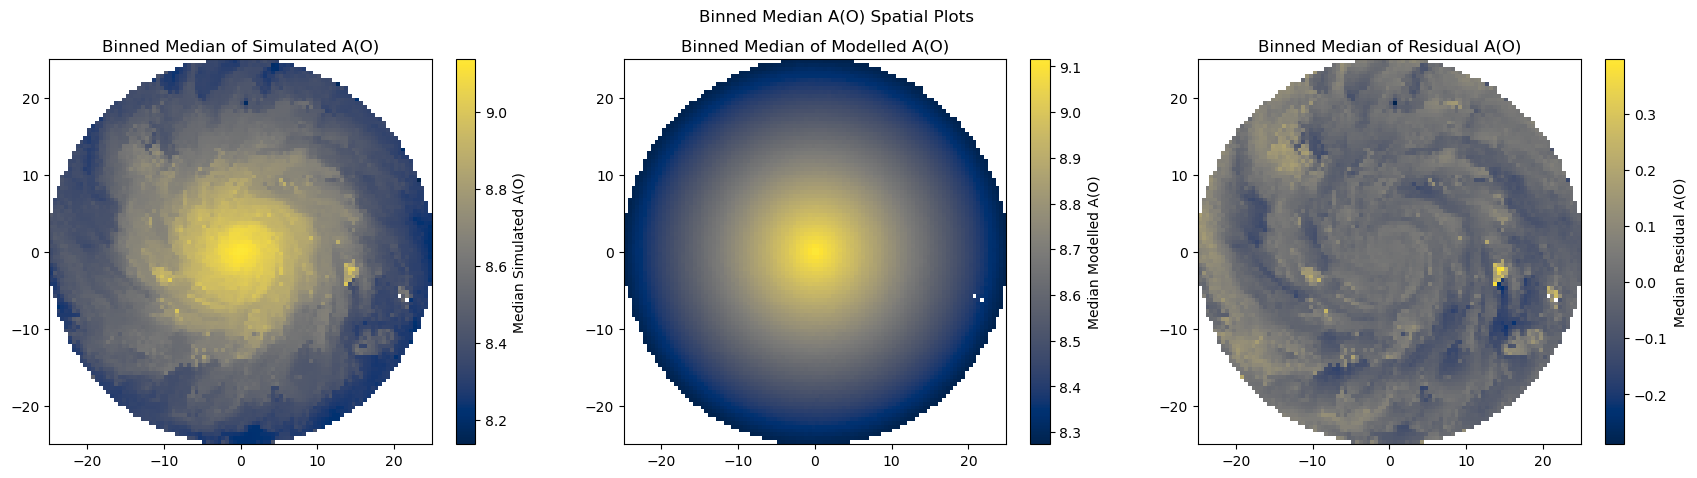

In [15]:
# More simple arrays
xs = data['x']
ys = data['y']

# Plot the data

# Define figure
fig, ax = plt.subplots(1, 3)
[ax1, ax2, ax3] = ax

# Set big parameters
fig.set_size_inches(21, 5)
fig.suptitle("Binned Median A(O) Spatial Plots")

# Define a nice colour map
cmap = 'cividis'
bins_total = 100

# Simulated A(O)'s
bin_stat_1, x_1, y_1, b_1 = binned_statistic_2d(xs, ys, a_O, statistic='median', bins=bins_total)
ax1.set_title("Binned Median of Simulated A(O)")
cim = ax1.imshow(bin_stat_1.T, origin='lower', aspect='auto',
                   extent=[x_1[0], x_1[-1], y_1[0], y_1[-1]],
                   cmap=cmap)
fig.colorbar(cim, ax=ax1, label="Median Simulated A(O)")

# Modelled A(O)'s
bin_stat_2, x_2, y_2, b_2 = binned_statistic_2d(xs, ys, ma_O, statistic='median', bins=bins_total)
ax2.set_title("Binned Median of Modelled A(O)")
cim = ax2.imshow(bin_stat_2.T, origin='lower', aspect='auto',
                   extent=[x_2[0], x_2[-1], y_2[0], y_2[-1]],
                   cmap=cmap)
fig.colorbar(cim, ax=ax2, label="Median Modelled A(O)")

# Residual A(O)'s
bin_stat_3, x_3, y_3, b_3 = binned_statistic_2d(xs, ys, da_O, statistic='median', bins=bins_total)
ax3.set_title("Binned Median of Residual A(O)")
cim = ax3.imshow(bin_stat_3.T, origin='lower', aspect='auto',
                   extent=[x_3[0], x_3[-1], y_3[0], y_3[-1]],
                   cmap=cmap)
fig.colorbar(cim, ax=ax3, label="Median Residual A(O)")

# Save and Show Figure
plt.savefig("./figures/gas_phase_metallicity_2.png", dpi=200)
plt.show()

### Part 5

We want a bin size that does not smooth over the small-scale imperfections, like the galaxy spiral arms or the nice painting-like flowy structures in the spirals. At the same time, we don't want to accidentally over-correct for the smaller variances in data, like 'dead pixels' (i.e. bins with no values) or pixels with ultra-concentrated values. I beleive that 100 is a nice round number to use because it shows all of these smaller scale structures while not sacrificing the meaningfullness of the data. There may be two dead pixels, however I think that this is a cost worth making.

### Part 6

The residual plots from Part 3 already show the intricate details of residual structure, however now I'll try to make meaning of the plot:

![](./figures/residuals_moving_average.png)

There is always going to be correlation with residuals, mainly because a smooth model cannot account for the inherent scatter in the data, and the scatter in the data is often correlated with the data itself. For example, poisson noise is proportional to the square root of measured intensity. This is why the scatter in the residuals appear to increase with time.

The actual values of the residuals also appear to "wave" a lot - this is most likely because the model doesn't account for the spiral structures in the simulated galaxy. It could be that the 'humps' in the residual plot corresponds to prominent spiral arms. It also explains why the model underestimates A(O) close to the centre - where the bulge is, and thus, where a lot of stars are.

Under this assumption, the implication is that the gas phase metallicity is higher surrounding stars/the ISM. Perhaps this is due to how Stars will die and release their gas into the ISM.